In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis
from scipy import stats, special
from scipy.stats import skew
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [2]:
from sklearn.model_selection import train_test_split

# Importing ML algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_score, f1_score,roc_auc_score,auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
import tensorflow as tf
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers

In [4]:
#URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
#Col_Names  = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']
data = pd.read_csv('./adult.csv')
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
data.describe(include='O')

workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

In [8]:
# what percentage of data is missing in the feature
round(data.isnull().sum(axis=0)/len(data),2)*100

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [9]:
# Target Variable
print(data['income'].unique())
print()

['<=50K' '>50K']



In [10]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [11]:
# 1 corresponds to Income less than 50k and 0 corresonds to greater than 50k
data['income'] = data['income'].map({'<=50K':0, '>50K':1})

In [12]:
data

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income  
0                 0             0              40  United-States       0  
1                 0             0              50  United-States       0  
2                 0             0              40  United-States       1  
3              7688             0              40  United-States       1  
4                 0             0              30  United-States       0  
...             ...           ...             ...            ...     ...  
48837             0             0              38  United-States       0  
48838             0             0              40  United-States       1  
48839             0             0              40  United-States       0  
48840             0             0              20  United-States       0  
48841         15024             0              40  United-States       1  

[48842 rows x 15 columns]

In [13]:
data.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


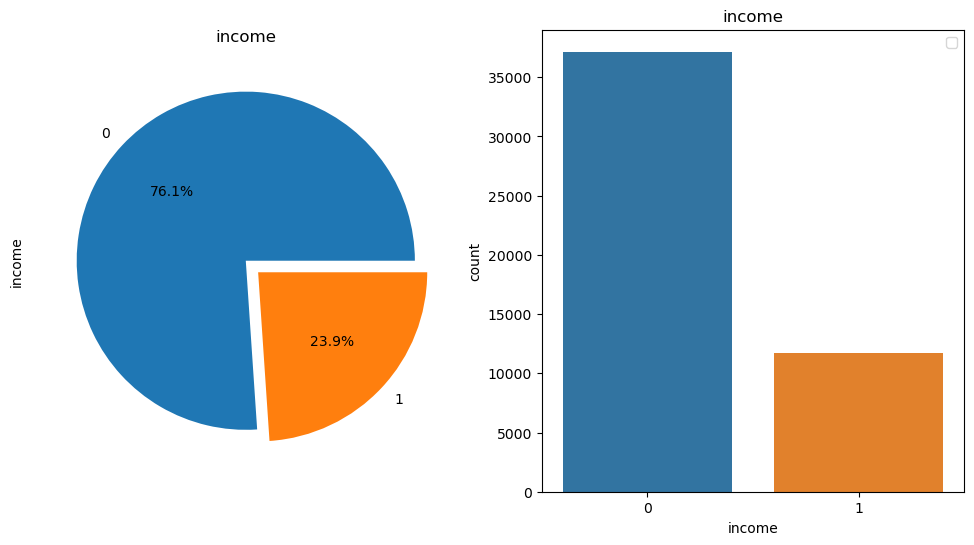

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
data['income'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('income')
sns.countplot('income',data=data,ax=axes[1])
axes[1].set_title('income')
plt.legend()
plt.show()

### Univariate Analysis using Training Numerical dataset

In [16]:
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(data[data[column].notnull()][column],ax=ax1)
    sns.boxplot(y=data[data[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(data[data[column].notnull()][column]))
    print("kurtosis : ",kurtosis(data[data[column].notnull()][column]))
    plt.show()

In [17]:
sns.set_theme(style="whitegrid")
def plot_count_boxplot(column):
    print(round(100*data[column].value_counts()/len(data[column]), 2))
    fig,ax1=plt.subplots(figsize=(12,6))
    sns.countplot(data=data, y=column, hue="income")
    plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


skewness :  0.23874232483428423
kurtosis :  2.9506341533210323


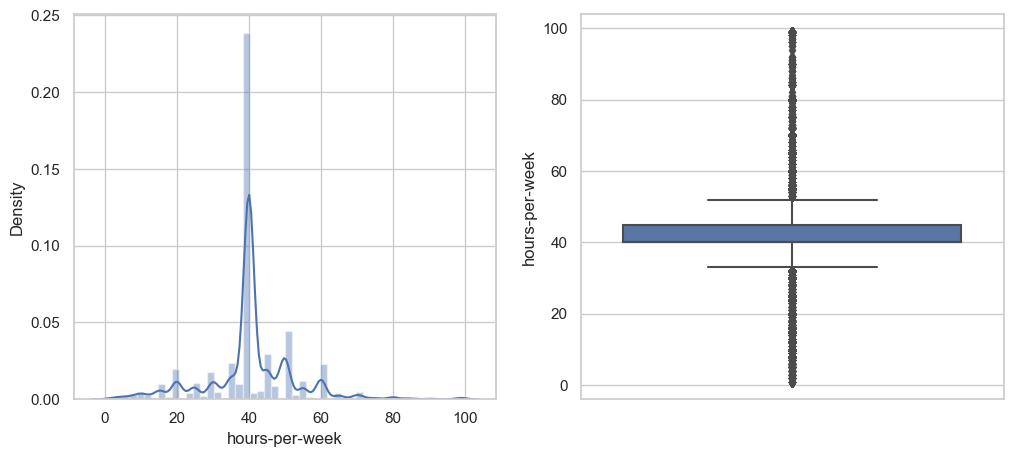

In [18]:
plot_hist_boxplot('hours-per-week')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


skewness :  11.894293693350866
kurtosis :  152.6773425724958


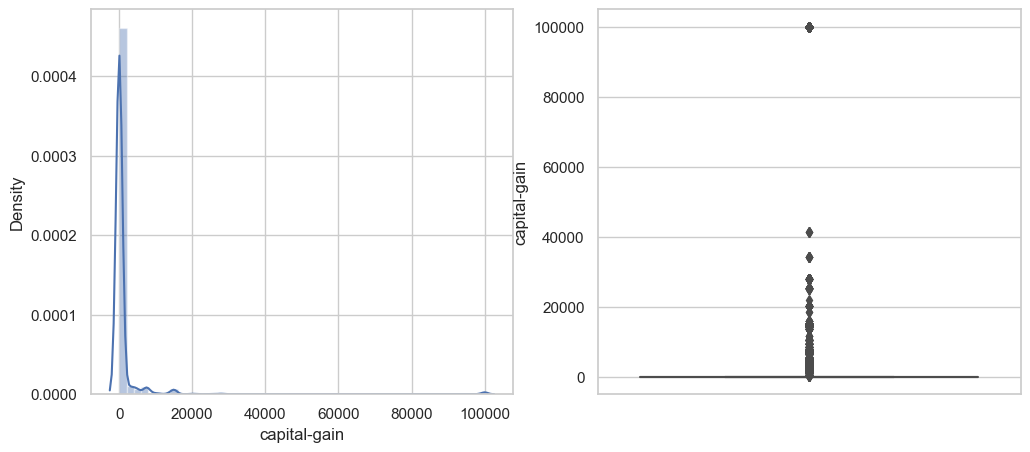

In [19]:
plot_hist_boxplot('capital-gain')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


skewness :  0.5575631924658626
kurtosis :  -0.18437271998310045


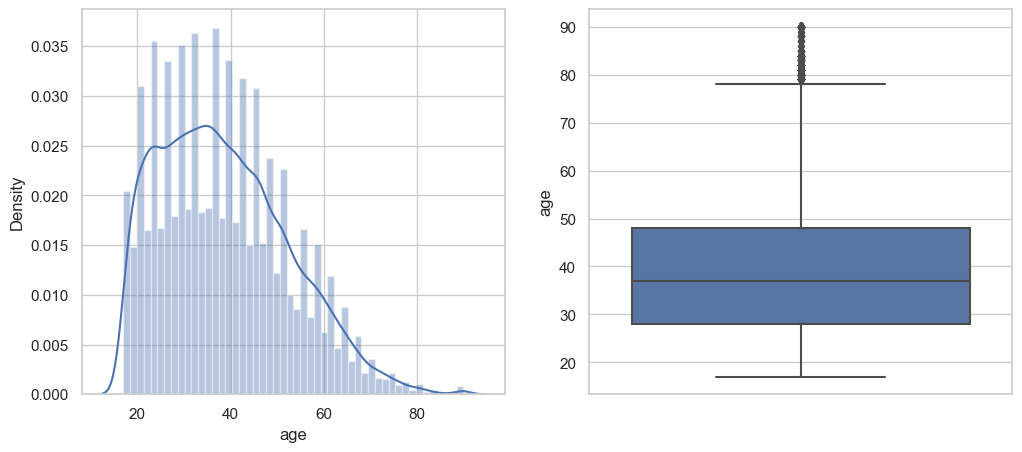

In [20]:
plot_hist_boxplot('age')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


skewness :  -0.3165151356965018
kurtosis :  0.6255583739336319


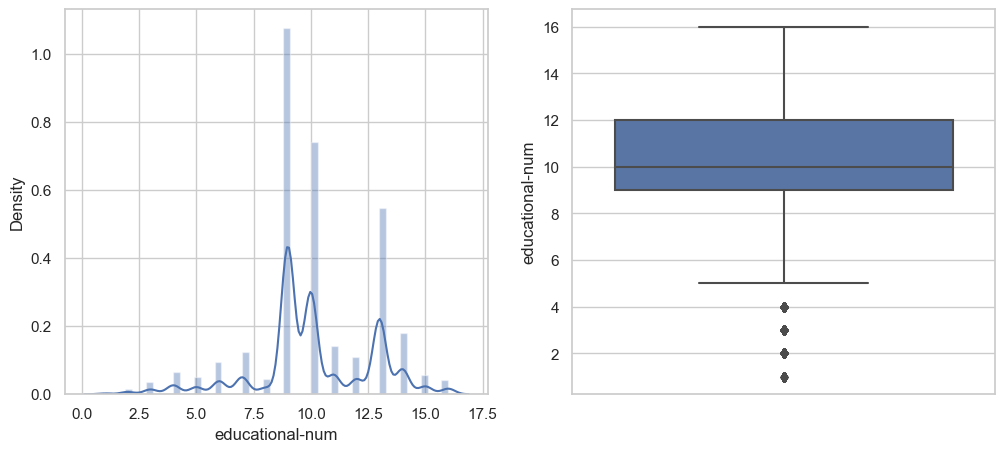

In [21]:
plot_hist_boxplot('educational-num')

HS-grad         32.32
Some-college    22.27
Bachelors       16.43
Masters          5.44
Assoc-voc        4.22
11th             3.71
Assoc-acdm       3.28
10th             2.84
7th-8th          1.96
Prof-school      1.71
9th              1.55
12th             1.35
Doctorate        1.22
5th-6th          1.04
1st-4th          0.51
Preschool        0.17
Name: education, dtype: float64


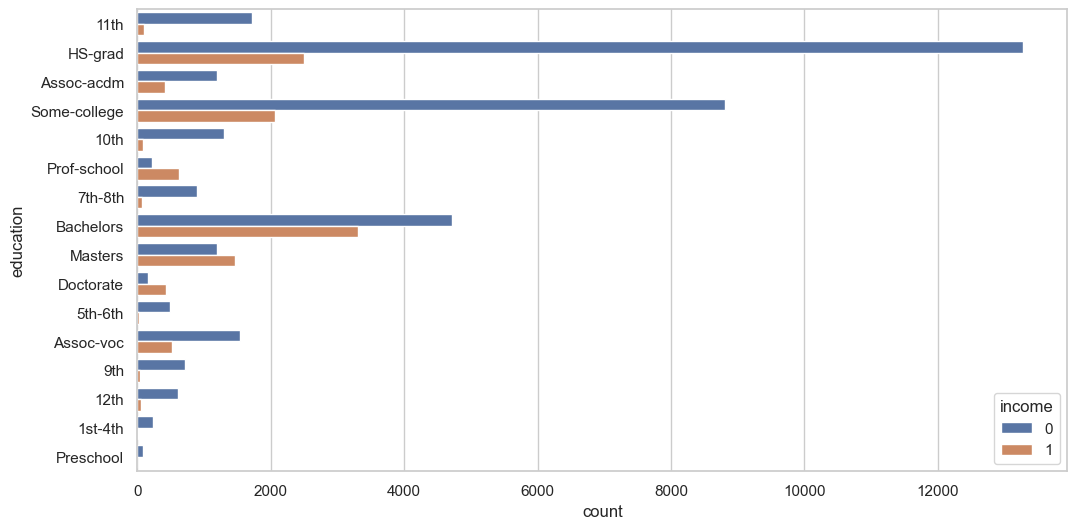

In [22]:
plot_count_boxplot('education')

Married-civ-spouse       45.82
Never-married            33.00
Divorced                 13.58
Separated                 3.13
Widowed                   3.11
Married-spouse-absent     1.29
Married-AF-spouse         0.08
Name: marital-status, dtype: float64


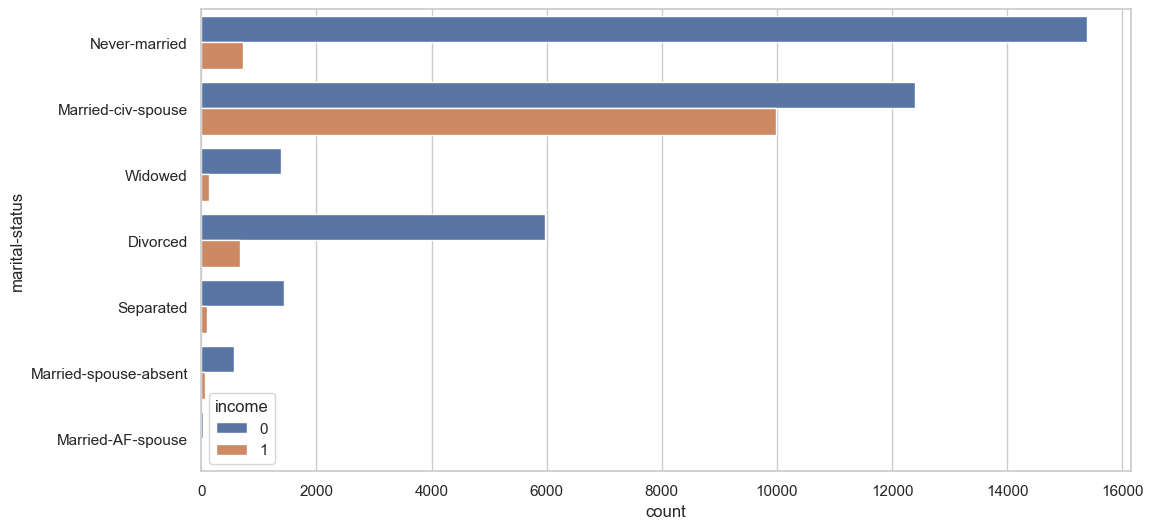

In [23]:
plot_count_boxplot('marital-status')

Prof-specialty       12.64
Craft-repair         12.51
Exec-managerial      12.46
Adm-clerical         11.49
Sales                11.27
Other-service        10.08
Machine-op-inspct     6.19
?                     5.75
Transport-moving      4.82
Handlers-cleaners     4.24
Farming-fishing       3.05
Tech-support          2.96
Protective-serv       2.01
Priv-house-serv       0.50
Armed-Forces          0.03
Name: occupation, dtype: float64


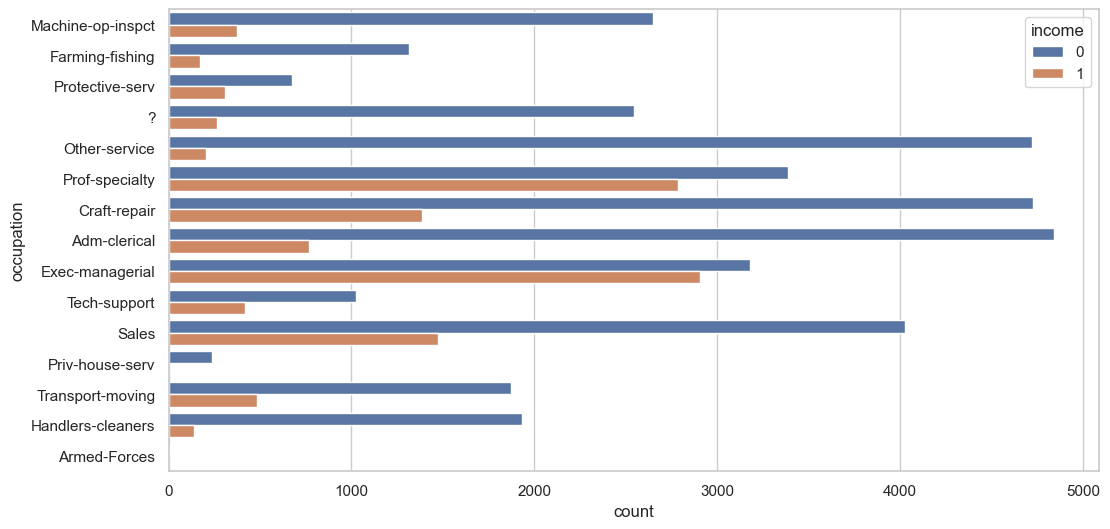

In [24]:
plot_count_boxplot('occupation')

Private             69.42
Self-emp-not-inc     7.91
Local-gov            6.42
?                    5.73
State-gov            4.06
Self-emp-inc         3.47
Federal-gov          2.93
Without-pay          0.04
Never-worked         0.02
Name: workclass, dtype: float64


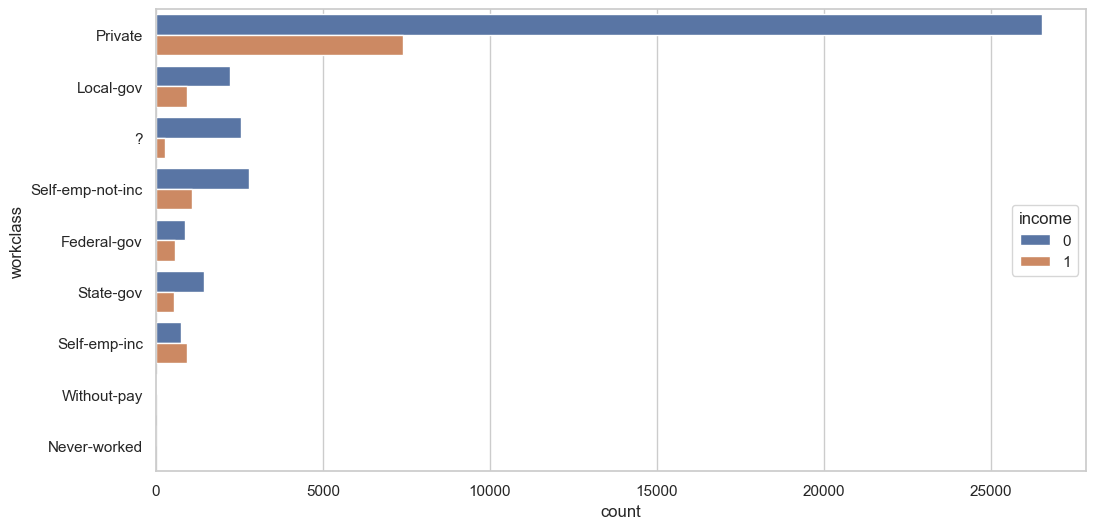

In [25]:
plot_count_boxplot('workclass')

Male      66.85
Female    33.15
Name: gender, dtype: float64


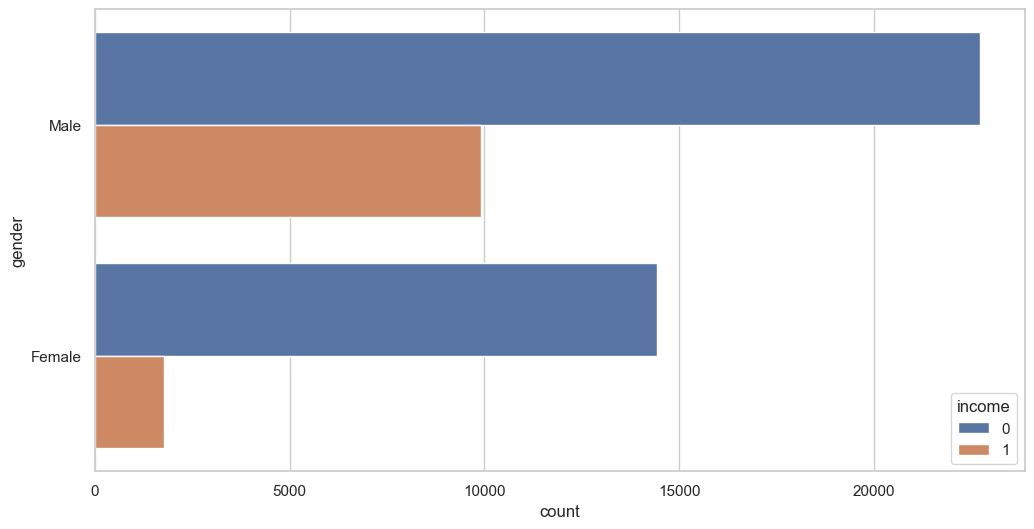

In [26]:
plot_count_boxplot('gender')

White                 85.50
Black                  9.59
Asian-Pac-Islander     3.11
Amer-Indian-Eskimo     0.96
Other                  0.83
Name: race, dtype: float64


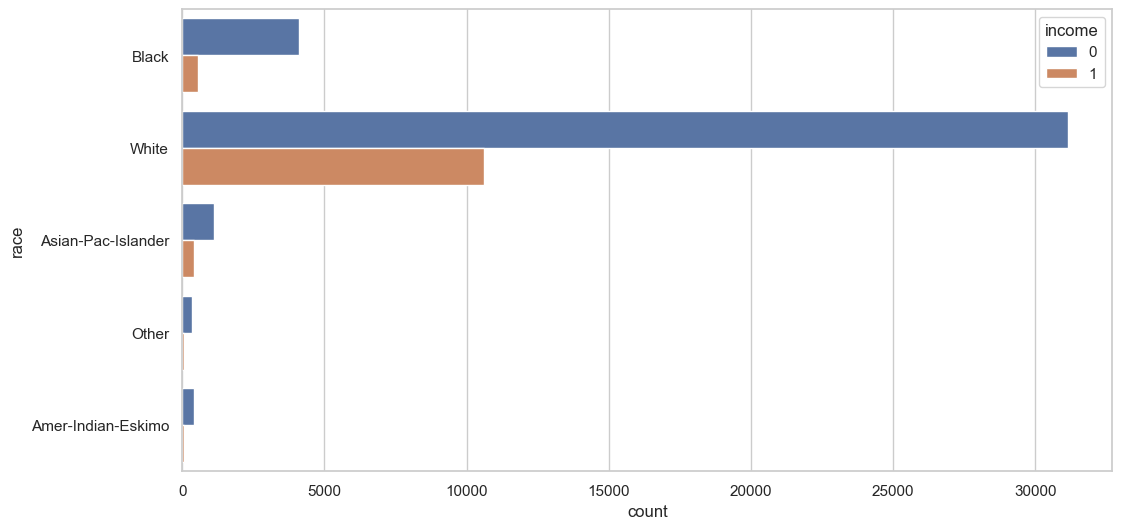

In [27]:
plot_count_boxplot('race')

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


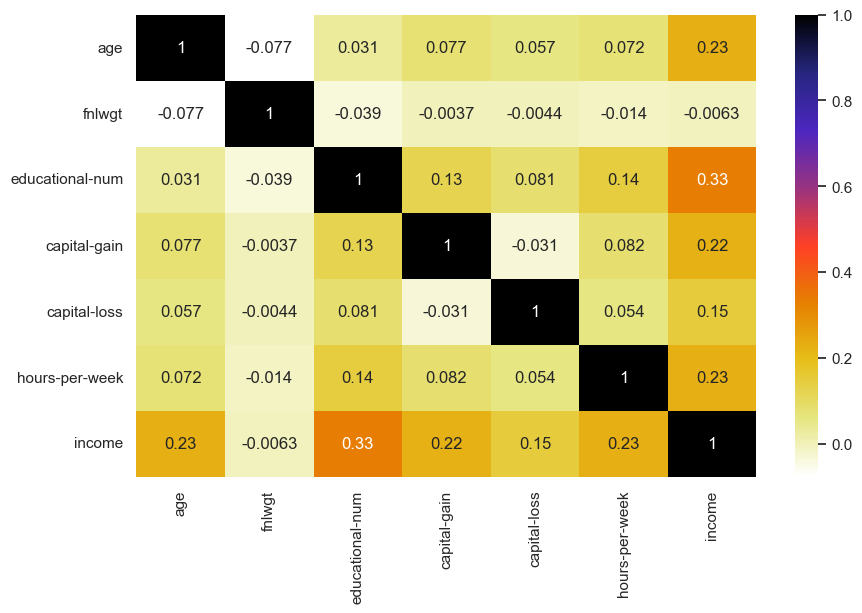

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
X = data.drop(['income'],axis=1)

In [30]:
X = pd.get_dummies(X)
X.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    1   
3            0                      0                    0   
4            1                      0                    0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                       0  ...                        0   
1                       0  ...                        0   
2                       0  ...                        0   
3                       0  ...                        0   
4                       0  ...                        0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
4                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
4                       0                          0  

[5 rows x 108 columns]

In [31]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[numericalcols] = sc.fit_transform(X[numericalcols])
X.head()

age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954        -0.030373     -0.144804     -0.217127   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0       -0.034087            0                      0                    0   
1        0.772930            0                      0                    0   
2       -0.034087            0                      0                    1   
3       -0.034087            0                      0                    0   
4       -0.841104            1                      0                    0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                       0  ...                        0   
1                       0  ...                        0   
2                       0  ...                        0   
3                       0  ...                        0   
4                       0  ...                        0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
4                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
4                       0                          0  

[5 rows x 108 columns]

In [33]:
y=data.income
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=89,test_size=0.3)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34189, 108), (14653, 108), (34189,), (14653,))

In [36]:
def cal_score(y_test, y_pred): 
    cm              = confusion_matrix(y_test, y_pred)
    prec_scr_macro  = precision_score(y_test, y_pred, average='macro')*100
    prec_scr_micro  = precision_score(y_test, y_pred, average='micro')*100
    rec_scr_macro   = recall_score(y_test ,y_pred, average='macro')*100
    rec_scr_micro   = recall_score(y_test ,y_pred, average='micro')*100
    f1_scr_macro    = f1_score(y_test, y_pred, average='macro')*100 
    f1_scr_micro    = f1_score(y_test, y_pred, average='micro')*100 
    return prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm

In [37]:
def metrics_calculation(classifier, training_data, testing_data, training_label, testing_label):
    
    result = []
    cols = ['Mean Accuracy', 'Accuracy deviation', 'Precision Macro', 'Precision Micro', 'Recall Macro','Recall Micro', 'F1 Score Macro', 'F1 Score Micro', 'Confusion Matrix']
    
    crs_val     = cross_val_score(classifier, training_data, training_label, cv=5)
    mean_acc = round(np.mean(crs_val),3)
    std_acc  = round(np.std(crs_val),3)
    classifier.fit(training_data, training_label)
    predictions = classifier.predict(testing_data)
    prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm = cal_score(testing_label, predictions)
    result.extend([mean_acc,std_acc, prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm])
    series_result = pd.Series(data=result, index=cols)
    
    return series_result

In [38]:
clf_dict = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Light GBM' : LGBMClassifier(random_state=42)
}

In [39]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [40]:
lr.score(X_test, y_test)

0.853681839896267

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
predictions = rf.predict(X_test)
prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm = cal_score(y_test, predictions)

In [43]:
prec_scr_macro

81.50405612452958

In [44]:
frame = {}
for key in clf_dict:

    classifier_result = metrics_calculation(clf_dict[key], X_train, X_test, y_train, y_test)
    frame[key]    = classifier_result
        
box_cox_smote_df = pd.DataFrame(frame)
box_cox_smote_df

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Random Forest  \
Mean Accuracy                              0.852   
Accuracy deviation                         0.003   
Precision Macro                        81.504056   
Precision Micro                        85.634341   
Recall Macro                           77.455638   
Recall Micro                           85.634341   
F1 Score Macro                         79.135214   
F1 Score Micro                         85.634341   
Confusion Matrix    [[10363, 743], [1362, 2185]]   

                                         XGBoost  \
Mean Accuracy                               0.87   
Accuracy deviation                         0.003   
Precision Macro                        84.170761   
Precision Micro                        87.333652   
Recall Macro                           79.756758   
Recall Micro                           87.333652   
F1 Score Macro                         81.597195   
F1 Score Micro                         87.333652   
Confusion Matrix    [[10489, 617], [1239, 2308]]   

                             Logistic Regression                     Light GBM  
Mean Accuracy                              0.851                         0.873  
Accuracy deviation                         0.002                         0.002  
Precision Macro                        81.303071                     84.601649  
Precision Micro                        85.368184                     87.565686  
Recall Macro                           76.694802                     79.976989  
Recall Micro                           85.368184                     87.565686  
F1 Score Macro                         78.550674                     81.894174  
F1 Score Micro                         85.368184                     87.565686  
Confusion Matrix    [[10385, 721], [1423, 2124]]  [[10516, 590], [1232, 2315]]

In [46]:
models = [
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(random_state=42)
    },
    {
    'label' : 'XGBoost',
    'model' : XGBClassifier(random_state=42)
    },
    {
    'label' : 'Logistic Regression',
    'model' : LogisticRegression(random_state=42)
    },
    {
    'label' : 'Light GBM',
    'model' : LGBMClassifier(random_state=42)
    }
]

In [47]:
def plot_multiplt_rocauc(models,train_X, train_y ,dev_X, dev_y):
    
    for m in models:
        model = m['model']   
        model.fit(train_X, train_y)
        y_pred = model.predict(dev_X)
        pred   = model.predict_proba(dev_X)
        pred_new = [i[1] for i in pred]
        fpr, tpr, thresholds = roc_curve(dev_y, pred_new)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display
    
    return 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


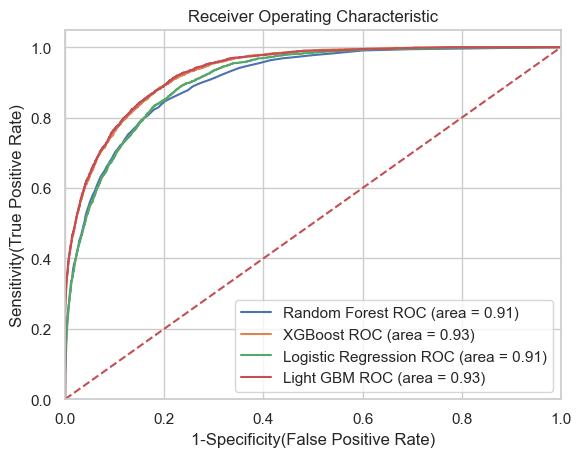

In [48]:
plot_multiplt_rocauc(models,X_train,y_train, X_test, y_test)

In [49]:
def plot_feature_importances(model, data):
    plt.figure(figsize=(8,6))
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

Model is  Random Forest
Model is  XGBoost
Model is  Light GBM


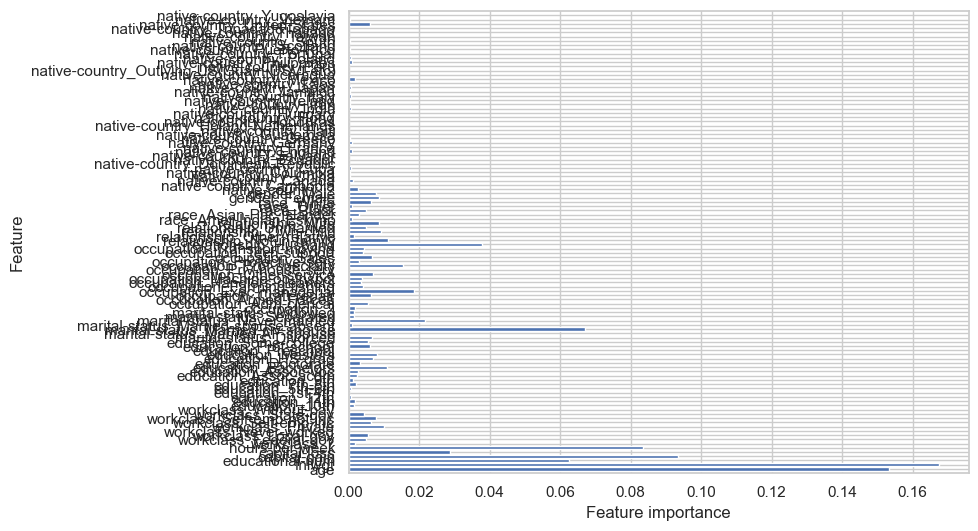

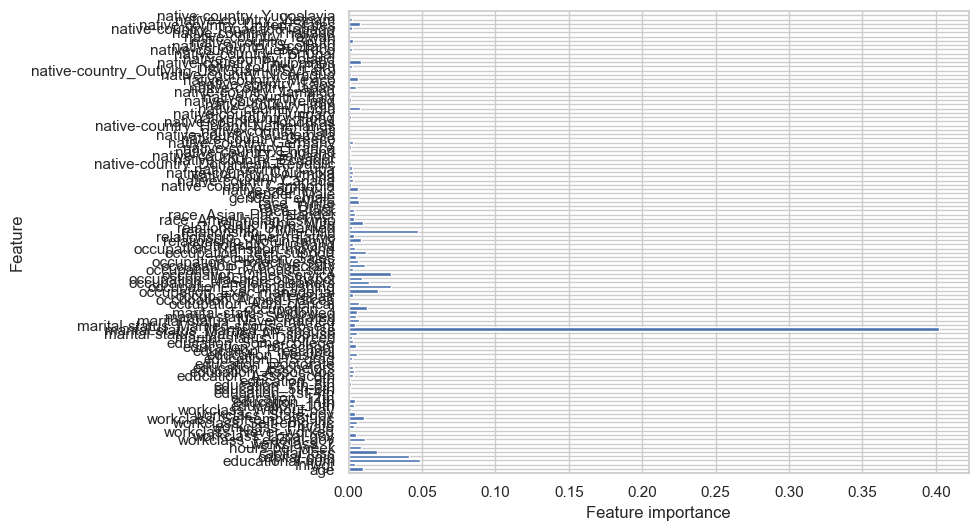

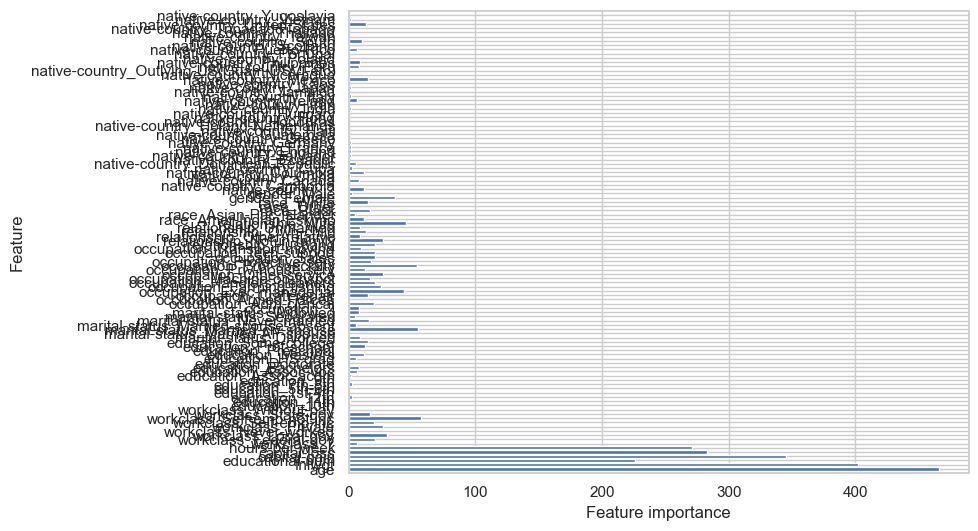

In [50]:
for key in clf_dict.keys():
    if key =='Logistic Regression':
        continue
    else:
        print('Model is ', key)
        plot_feature_importances(clf_dict[key], X_train)

In [53]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Feature  Correlation
3                         capital-gain     2.324110
33   marital-status_Married-civ-spouse     1.480104
32    marital-status_Married-AF-spouse     1.245893
76               native-country_France     1.030511
87              native-country_Ireland     0.903498
..                                 ...          ...
56              relationship_Own-child    -0.934276
101               native-country_South    -0.996433
35        marital-status_Never-married    -1.156287
47          occupation_Priv-house-serv    -1.524828
70             native-country_Columbia    -1.656781

[108 rows x 2 columns]

In [63]:
def RFE(model, training_data, training_label):
    rfc = model
    rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
    rfecv.fit(training_data, training_label)

    print('Optimal number of features: {}'.format(rfecv.n_features_))
    training_data_rfe = training_data.drop(training_data.columns[np.where(rfecv.support_ == False)[0]], axis=1)
    
    plt.figure(figsize=(16, 9))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv.support_) + 1), rfecv.support_, color='#303F9F', linewidth=3)
    plt.show()
    
    dset = pd.DataFrame()
    dset['attr'] = training_data.columns
    dset['importance'] = rfecv.estimator_.feature_importances_

    dset = dset.sort_values(by='importance', ascending=False)


    plt.figure(figsize=(16, 14))
    plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
    plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Importance', fontsize=14, labelpad=20)
    plt.show()
    
    return training_data_rfe.columns.tolist()

In [64]:
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
rfecv.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 36


In [67]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
n_scores

108

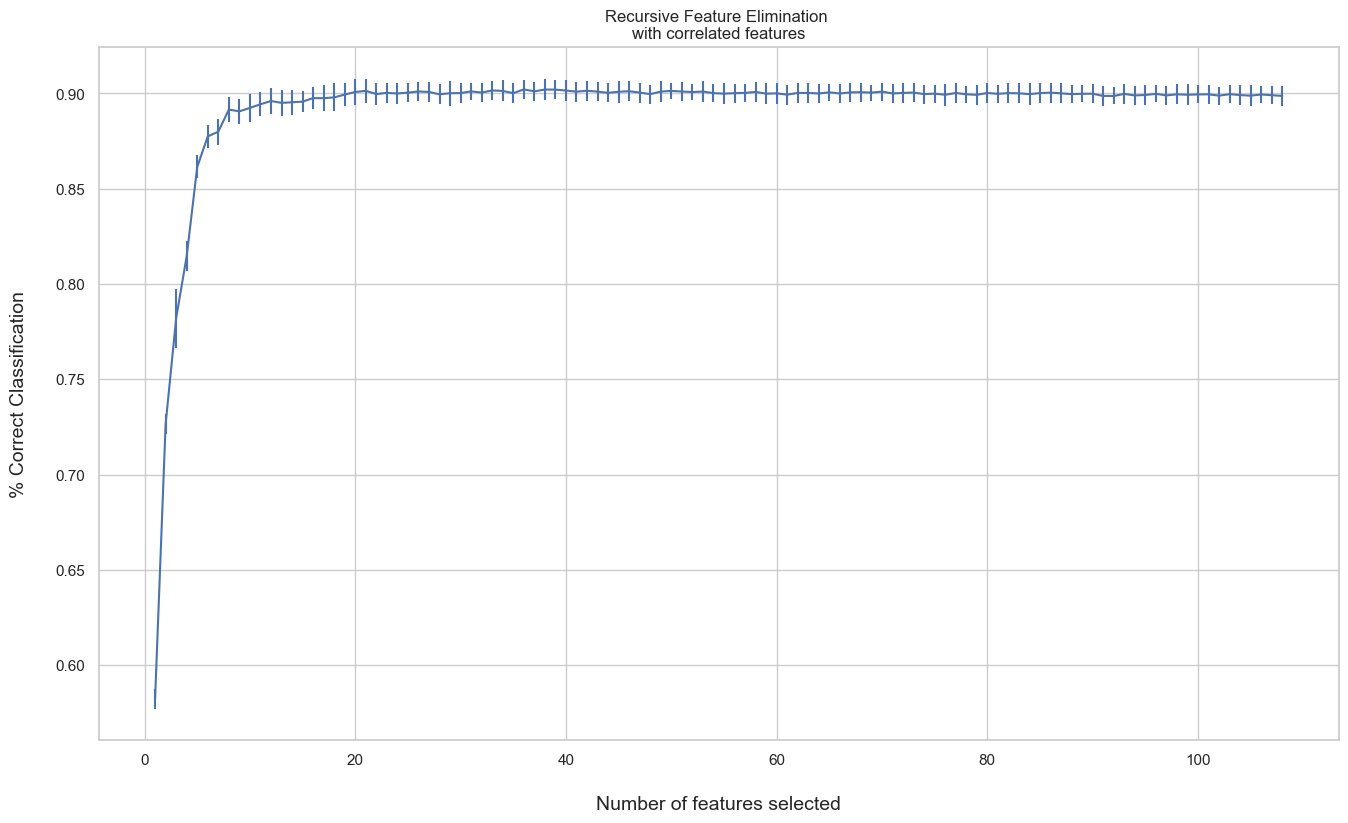

In [72]:
min_features_to_select = 1
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
#plt.plot(range(min_features_to_select, n_scores + min_features_to_select), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.errorbar(range(min_features_to_select, n_scores + min_features_to_select), rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [73]:
print(np.where(rfecv.support_ == False)[0])

X_train_rfe = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)
X_train_rfe.columns

[  6   9  14  15  16  17  18  19  20  21  22  23  25  28  29  32  34  36
  37  38  40  43  44  45  47  49  55  57  59  60  62  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 107]


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_Bachelors', 'education_HS-grad', 'education_Masters',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Wife', 'race_Black',
       'race_White', 'gender_Female', 'gender_Male',
       'native-country_United-States'],
      dtype='object')

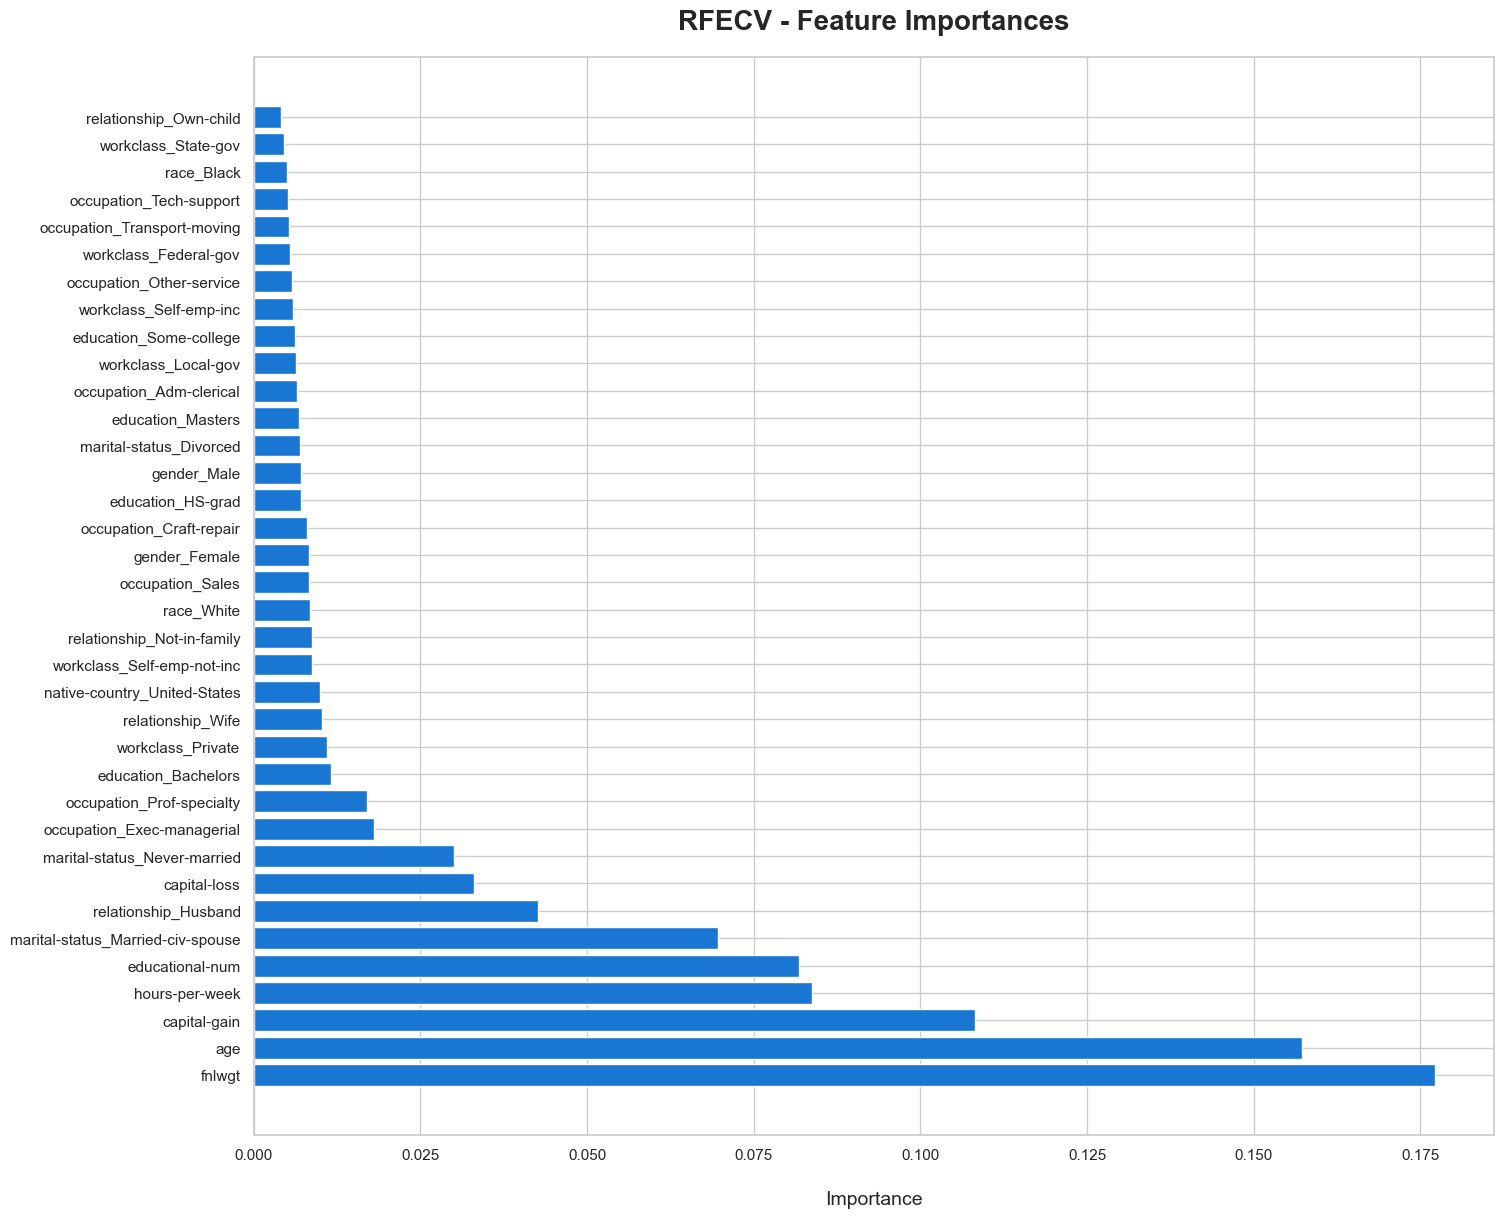

In [77]:
dset = pd.DataFrame()
dset['attr'] = X_train_rfe.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [78]:
def hyperparameter_tuning(classifier, training_dataset, test_dataset, training_label, test_label):
    
    result = []
    cols = ['Precision', 'Recall', 'F1 Score', 'Confusion Matrix']
    
    model_name = {}
    class_str = str(classifier)
    if 'Random' in class_str:
        param_grid={
    "n_estimators":[27,36,100,200],
    "max_depth":[5,7,9,15],
    "min_samples_leaf":[2,4,6,8]
        }
        model = GridSearchCV(classifier, param_grid = param_grid, cv=StratifiedKFold(5))
        model.fit(training_dataset, training_label)
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)

    elif 'XG' in class_str:
        model_name = {}
        parameters = {
    'n_estimators': [100, 200], 
  'max_depth': [3, 5, 8], 
  'gamma' : [0.25,0.5,1],
  'reg_alpha': [0.1, 0.25, 0.5],
  'reg_lambda': [0.5,1,1.15],
  'scale_pos_weight' : [8,10,12,15]
    }
        model = GridSearchCV(classifier, parameters, scoring="neg_log_loss", cv = StratifiedKFold(5), n_jobs = -1, verbose = 2)
        
        model.fit(training_dataset, training_label)
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)
        
    else:
        model_name = {}
        param_grid = {'n_estimators': [100,250,400],
          'min_split_gain' : [0.25,0.45,0.7],
         'max_depth': [4,7,10],
         'subsample': [0.65,0.85],
         'colsample_bytree': [0.45,0.65,0.85],
         'reg_lambda': [0.5,1,3,5],
         'num_leaves' : [30,50,70],
         'min_data_in_leaf' : [100,400,600]
         }
        
        model = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = StratifiedKFold(5), n_jobs = -1, verbose = 2)
        
        model.fit(training_dataset, training_label)
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)
        
    prec_scr, rec_scr, f1_scr, cm = cal_score(test_label, y_pred)
    result.extend([prec_scr, rec_scr, f1_scr, cm])
    series_result = pd.Series(data=result, index=cols)   
    
    return series_result, model_name

In [79]:
frame_hyperparamater = {} ; model_params = []
for key in clf_dict:
    print(key)
    if key == 'Logistic Regression':
        continue
        hyperparamater_result, model_paramters = hyperparameter_tuning(clf_dict[key], X_train, X_test, y_train, y_test)
        frame_hyperparamater[key]    = hyperparamater_result
        model_params.append(model_paramters)
        
tuned_df = pd.DataFrame(frame_hyperparamater)

Random Forest
XGBoost
Logistic Regression
Light GBM


In [80]:
model_params

[]

In [81]:
clf_dict_balanced = {'Random Forest': RandomForestClassifier(max_depth=15, min_samples_leaf=8, n_estimators=200, random_state=42, class_weight={0:1,1:10}),
           'XGBoost': XGBClassifier(gamma=1, max_depth=8, n_estimators=200, random_state=42, reg_alpha=0.5, reg_lambda=1.15, scale_pos_weight=10),
            'Logistic Regression': LogisticRegression(random_state=42, class_weight={0:1,1:10}),
            'Light GBM': LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400, min_split_gain=0.25, num_leaves=70, random_state=42, reg_lambda=5, subsample=0.65, scale_pos_weight=10)}

In [82]:
frame_balanced = {}
for key in clf_dict_balanced:

    classifier_result_balanced = metrics_calculation(clf_dict_balanced[key], X_train, X_test, y_train, y_test)
    frame_balanced[key]    = classifier_result_balanced
        
balanced_df = pd.DataFrame(frame_balanced)
balanced_df

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


Random Forest                      XGBoost  \
Mean Accuracy                              0.71                        0.818   
Accuracy deviation                        0.008                        0.004   
Precision Macro                       71.930285                     76.51835   
Precision Micro                       71.343752                    81.601037   
Recall Macro                          79.867727                    83.410639   
Recall Micro                          71.343752                    81.601037   
F1 Score Macro                        69.485476                    78.195365   
F1 Score Micro                        71.343752                    81.601037   
Confusion Matrix    [[7035, 4071], [128, 3419]]  [[8874, 2232], [464, 3083]]   

                            Logistic Regression                    Light GBM  
Mean Accuracy                             0.708                        0.715  
Accuracy deviation                        0.007                        0.005  
Precision Macro                       71.938958                    72.376279  
Precision Micro                       71.487067                    72.108101  
Recall Macro                          79.885516                    80.487092  
Recall Micro                          71.487067                    72.108101  
F1 Score Macro                        69.597532                    70.204202  
F1 Score Micro                        71.487067                    72.108101  
Confusion Matrix    [[7064, 4042], [136, 3411]]  [[7135, 3971], [116, 3431]]

In [83]:
models_balanced = [
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=15, min_samples_leaf=8, n_estimators=200, random_state=42, class_weight={0:1,1:10})
    },
    {
    'label' : 'XGBoost',
    'model' : XGBClassifier(gamma=1, max_depth=8, n_estimators=200, random_state=42, reg_alpha=0.5, reg_lambda=1.15, scale_pos_weight=10)
    },
    {
    'label' : 'Logistic Regression',
    'model' : LogisticRegression(random_state=42, class_weight={0:1,1:10})
    },
    {
    'label' : 'Light GBM',
    'model' : LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400, min_split_gain=0.25, num_leaves=70, random_state=42, reg_lambda=5, subsample=0.65, scale_pos_weight=10)
    }
]

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


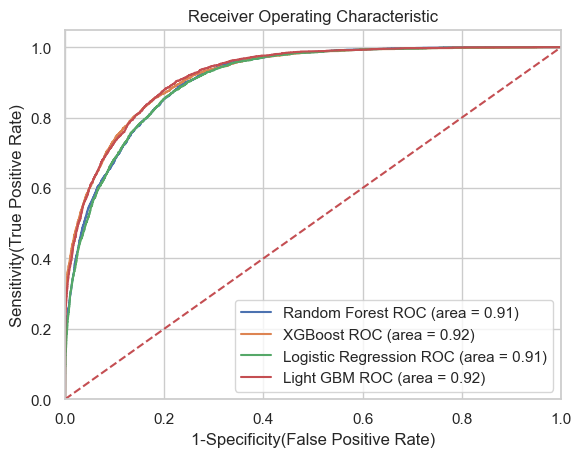

In [86]:
plot_multiplt_rocauc(models_balanced,X_train, y_train, X_test, y_test)

In [87]:
model_lgb = LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400, min_split_gain=0.25, num_leaves=70, random_state=42, reg_lambda=5, subsample=0.65, scale_pos_weight=10)

model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400,
               min_split_gain=0.25, num_leaves=70, random_state=42,
               reg_lambda=5, scale_pos_weight=10, subsample=0.65)

In [89]:
y_pred = model_lgb.predict(X_test)
X_test['predictions'] = y_pred

In [90]:
predict_model_lgb = lambda x: model_lgb.predict_proba(x).astype(float)

In [93]:
X_test = X_test.drop(columns = ['predictions'])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


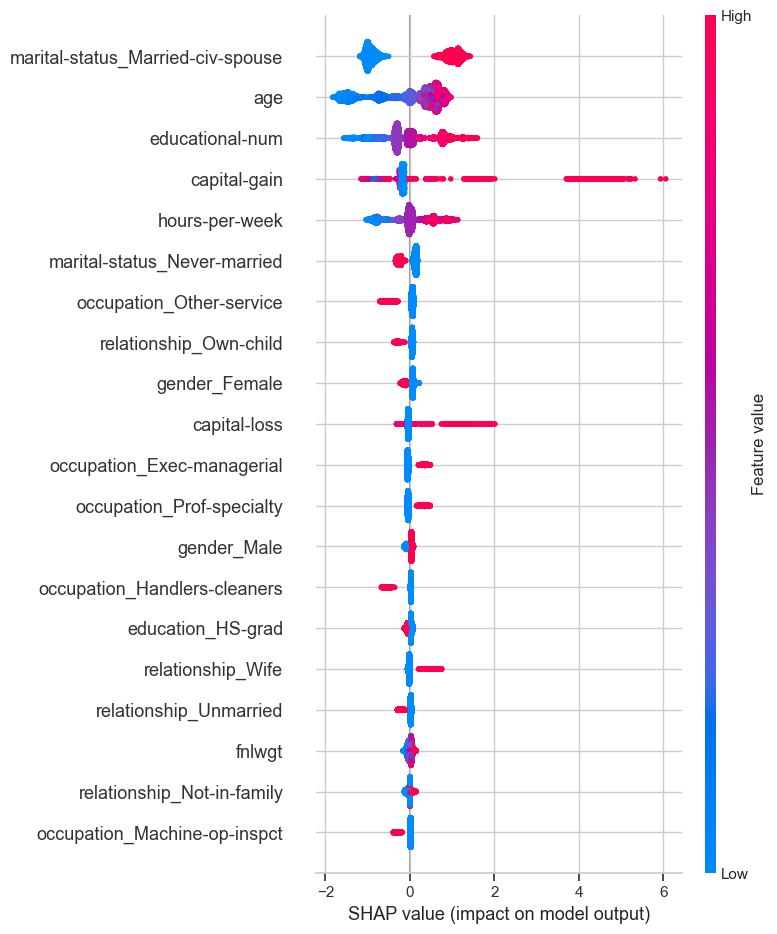

In [94]:
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values[1], X_importance)

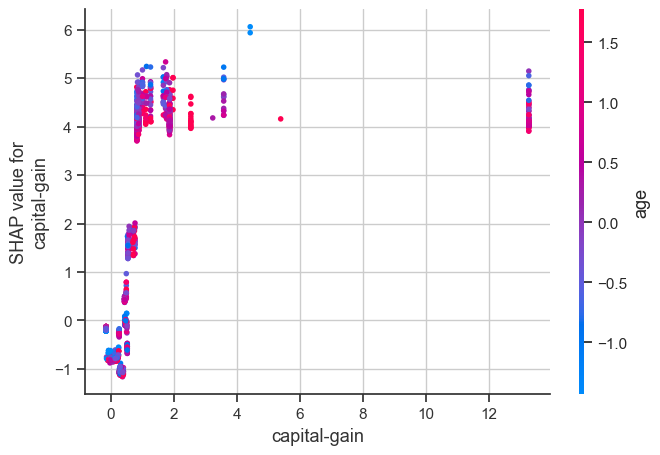

In [96]:
shap.dependence_plot("capital-gain", shap_values[1], X_importance)

In [97]:
# creating the explainer function
explainer = LimeTabularExplainer(X_test.values, mode="classification", feature_names=X_test.columns)

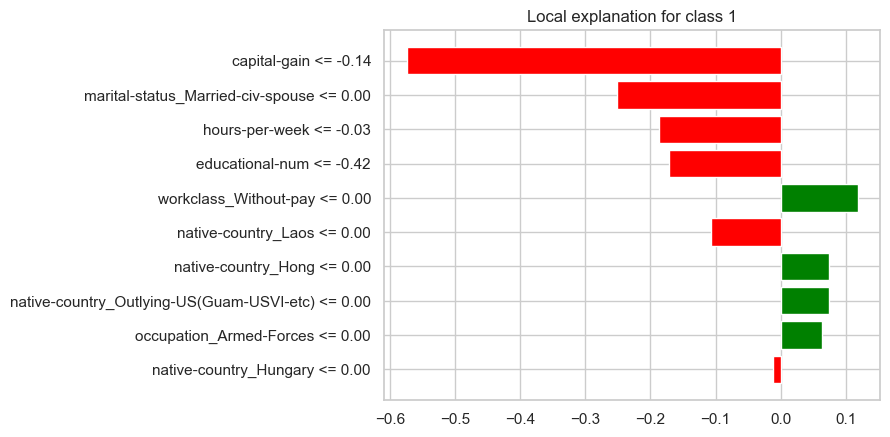

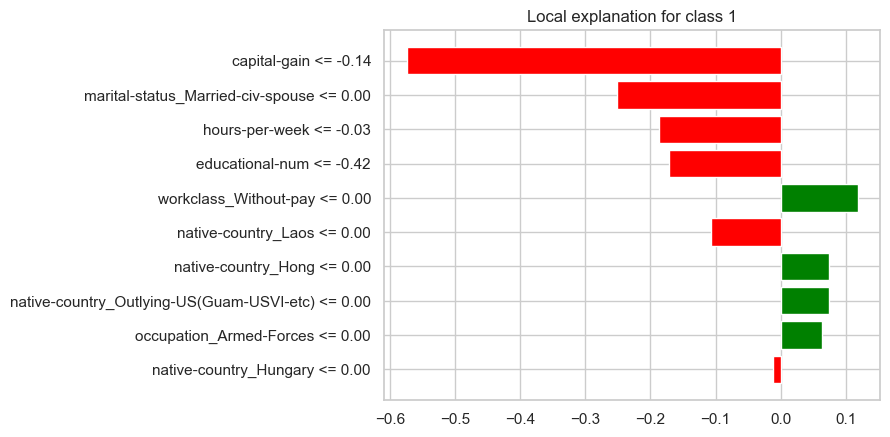

In [98]:
exp = explainer.explain_instance(X_test.iloc[3], 
     predict_model_lgb, num_features=10)
exp.as_pyplot_figure()

In [100]:
# storing a new observation
i = 37
X_observation = X_test.iloc[[i], :]

# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], predict_model_lgb)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.6439852391741115


In [102]:
# storing a new observation
i = 25
X_observation = X_test.iloc[[i], :]

# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], predict_model_lgb)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.6516999565213211
